In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flight_df=pd.read_csv(r"C:\Users\Lenovo\Music\EDA Practice\Clean_Dataset.csv")
flight_df
flight_df.drop(['Unnamed: 0'],axis=1,inplace=True)
flight_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


**DATAFRAME QUICK CHECKS**

In [3]:
cat=flight_df.select_dtypes(include='object').columns
num=flight_df.select_dtypes(exclude='object').columns

In [4]:
cat

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [5]:
num

Index(['duration', 'days_left', 'price'], dtype='object')

In [6]:
flight_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
flight_df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [8]:
flight_df.shape

(300153, 11)

In [9]:
flight_df.size

3301683

In [10]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [11]:
flight_df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

**Catergorical Column Analysis**

In [13]:
flight_df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [14]:
flight_df['airline'].nunique()

6

In [15]:
flight_df['airline']
con=flight_df['airline']=='SpiceJet'
len(flight_df[con])

9011

In [16]:
unique=flight_df['airline'].unique()
for i in unique:
    flight_df['airline']
    con=flight_df['airline']==i
    count=len(flight_df[con])
    print(f"the number of passengers travelling from {i} are : {count}" )

the number of passengers travelling from SpiceJet are : 9011
the number of passengers travelling from AirAsia are : 16098
the number of passengers travelling from Vistara are : 127859
the number of passengers travelling from GO_FIRST are : 23173
the number of passengers travelling from Indigo are : 43120
the number of passengers travelling from Air_India are : 80892


In [17]:
for i in flight_df['airline'].unique():
    con=flight_df['airline']==i
    print(f"the {len(flight_df[con])} number of passengers travelling from {i}")

the 9011 number of passengers travelling from SpiceJet
the 16098 number of passengers travelling from AirAsia
the 127859 number of passengers travelling from Vistara
the 23173 number of passengers travelling from GO_FIRST
the 43120 number of passengers travelling from Indigo
the 80892 number of passengers travelling from Air_India


In [18]:
unique=flight_df['airline'].unique()
count=[]
for i in unique:
    flight_df['airline']
    con=flight_df['airline']==i
    count.append(len(flight_df[con]))

In [19]:
count

[9011, 16098, 127859, 23173, 43120, 80892]

**Create a Frequency Table**

In [21]:
cols=['airlines','no.of passengers']
pd.DataFrame(zip(unique,count),columns=cols)

,airlines,no.of passengers
0,SpiceJet,9011
1,AirAsia,16098
2,Vistara,127859
3,GO_FIRST,23173
4,Indigo,43120
5,Air_India,80892


**Create a table using value counts**

In [23]:
flight_df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [24]:
keys=flight_df['airline'].value_counts().keys()
values=flight_df['airline'].value_counts().values

In [25]:
keys

Index(['Vistara', 'Air_India', 'Indigo', 'GO_FIRST', 'AirAsia', 'SpiceJet'], dtype='object', name='airline')

In [26]:
values

array([127859,  80892,  43120,  23173,  16098,   9011], dtype=int64)

**Bar Plot**

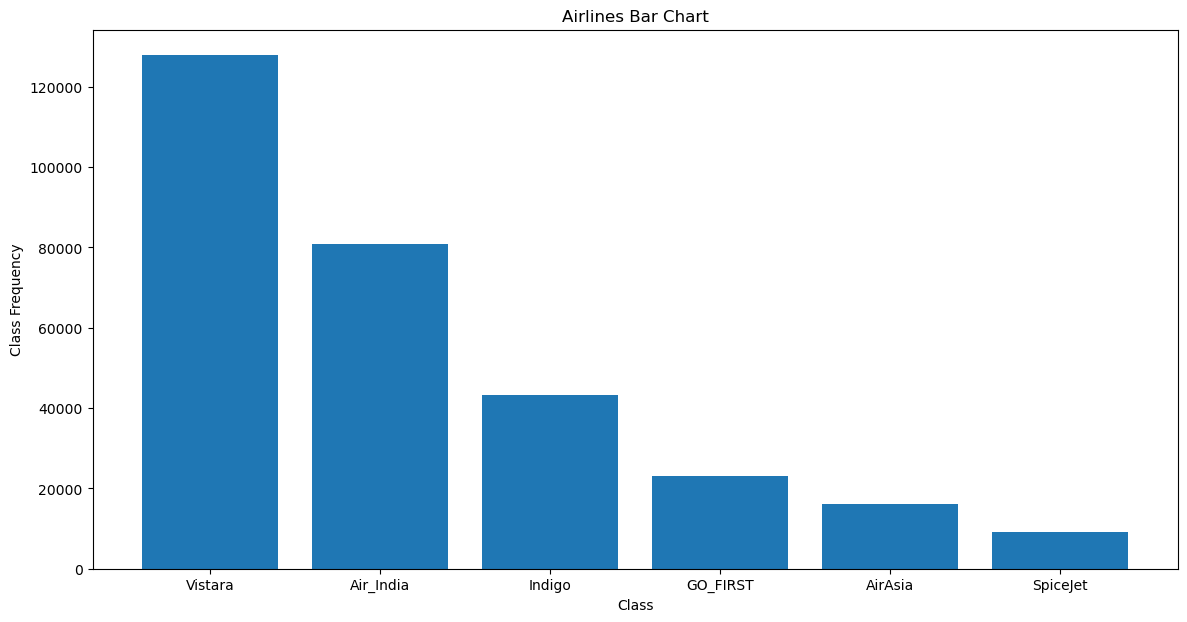

In [28]:
keys=flight_df['airline'].value_counts().keys()
values=flight_df['airline'].value_counts().values
plt.figure(figsize=(14,7))
plt.bar(keys,values)
plt.xlabel('Class')
plt.ylabel('Class Frequency')
plt.title('Airlines Bar Chart')
plt.savefig('Airlines_barchart.jpg')
plt.show()

**Draw the bar plot using countplot**

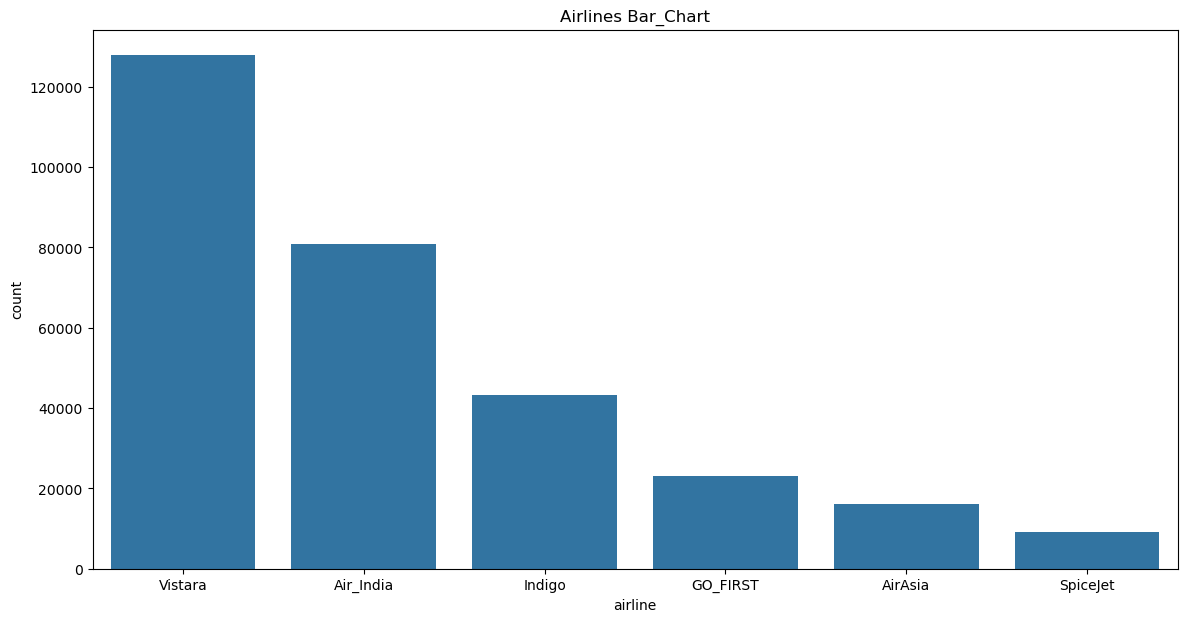

In [30]:
keys=flight_df['airline'].value_counts().keys()
plt.figure(figsize=(14,7))
sns.countplot(data=flight_df,x='airline',order=keys)
plt.title('Airlines Bar_Chart')
plt.show()

**SubPlots**

<Axes: xlabel='class', ylabel='count'>

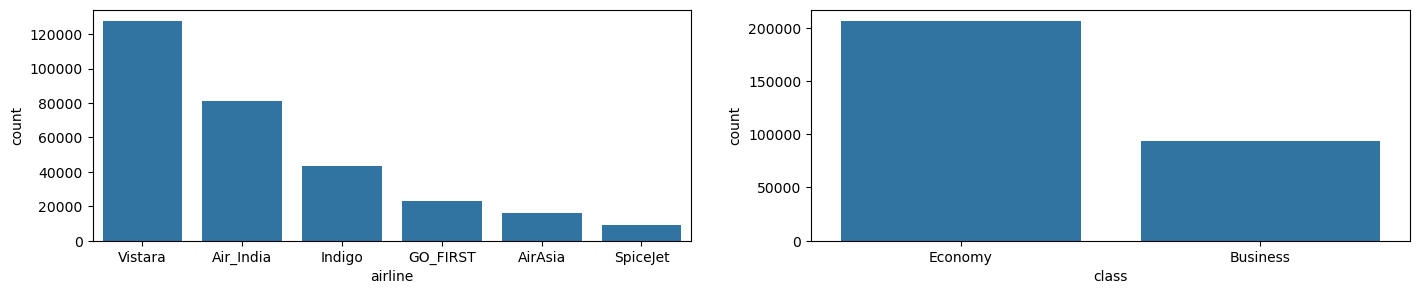

In [32]:
keys=flight_df['airline'].value_counts().keys()
plt.figure(figsize=(17,3))
plt.subplot(1,2,1)
sns.countplot(data=flight_df,x='airline',order=keys)

keys=flight_df['class'].value_counts().keys()
plt.subplot(1,2,2)
sns.countplot(data=flight_df,x='class',order=keys)

In [33]:
cat

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

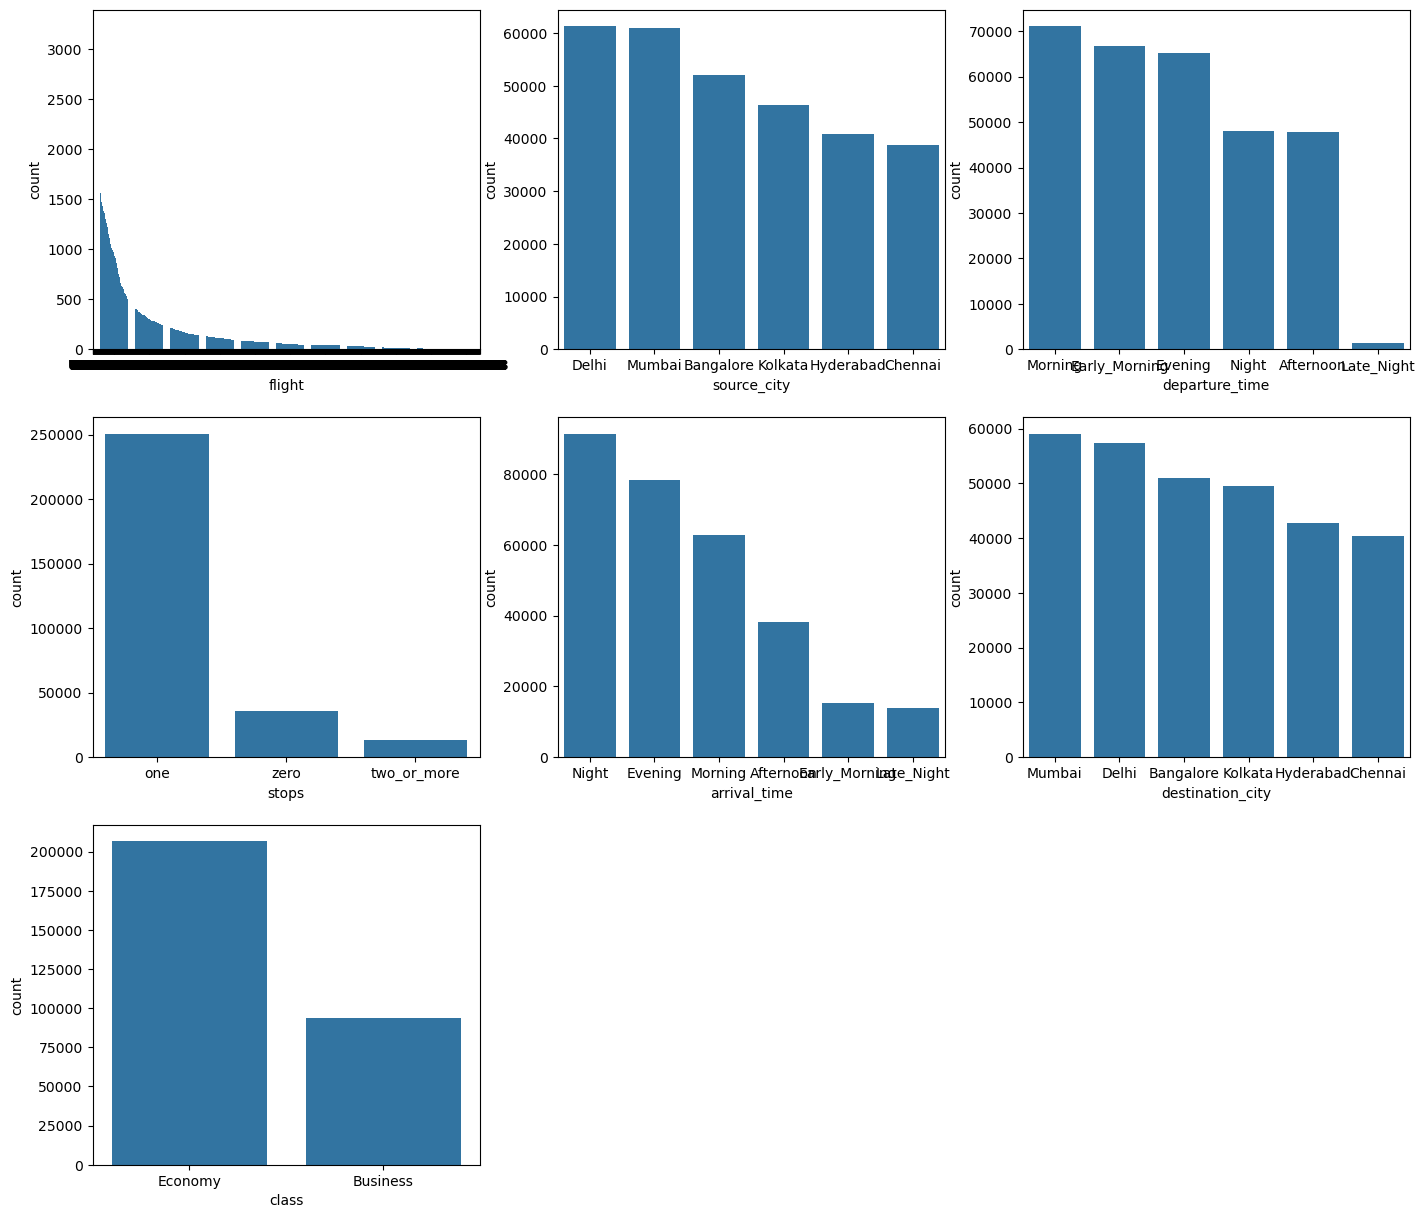

In [34]:
plt.figure(figsize=(17,15))
for i in range(1,8):
    keys=flight_df[cat[i]].value_counts().keys()
    plt.subplot(3,3,i)
    sns.countplot(data=flight_df,x=cat[i],order=keys)

**PieChart**

([<matplotlib.patches.Wedge at 0x2018bdd4d10>,
 [Text(0.2534976232555898, 1.0703919632563426, 'Vistara'),
  Text(-1.0208842955506634, -0.40962819128817995, 'Air_India'),
  Text(0.1194160755622762, -1.0934988801536585, 'Indigo'),
  Text(0.7911116107509573, -0.7642921034100942, 'GO_FIRST'),
  Text(1.0305975642945853, -0.384536942919752, 'AirAsia'),
  Text(1.0951112046845128, -0.10359270907952613, 'SpiceJet')],
 [Text(0.13827143086668534, 0.5838501617761868, '42.60%'),
  Text(-0.5568459793912709, -0.22343355888446176, '26.95%'),
  Text(0.065136041215787, -0.5964539346292682, '14.37%'),
  Text(0.43151542404597665, -0.41688660186005133, '7.72%'),
  Text(0.5621441259788645, -0.2097474234107738, '5.36%'),
  Text(0.5973333843733706, -0.05650511404337788, '3.00%')])

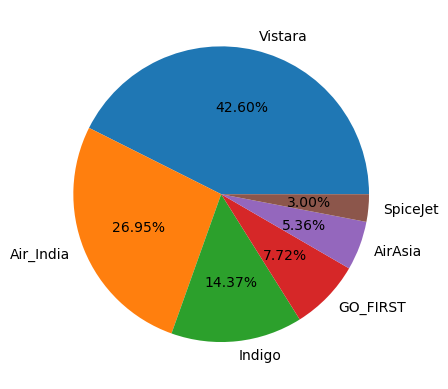

In [36]:
keys=flight_df['airline'].value_counts().keys()
values=flight_df['airline'].value_counts().values
plt.pie(values,labels=keys,autopct='%0.2f%%',radius=1)

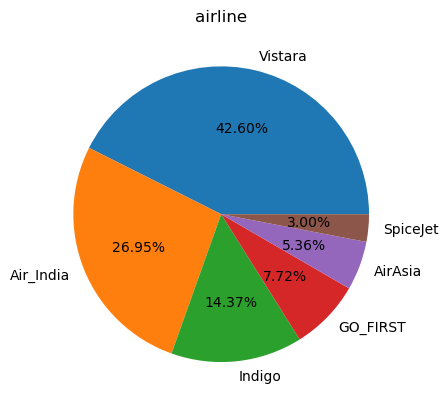

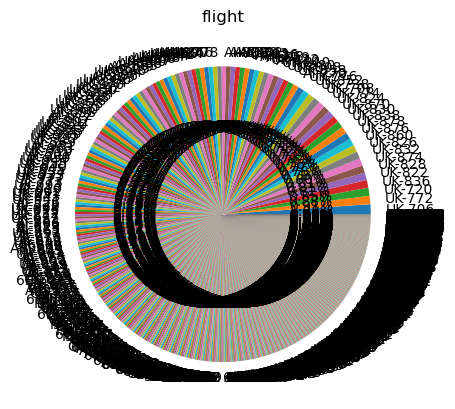

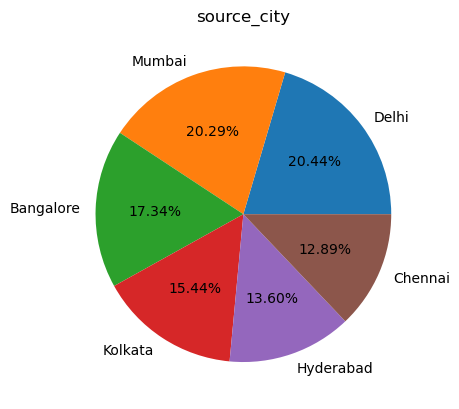

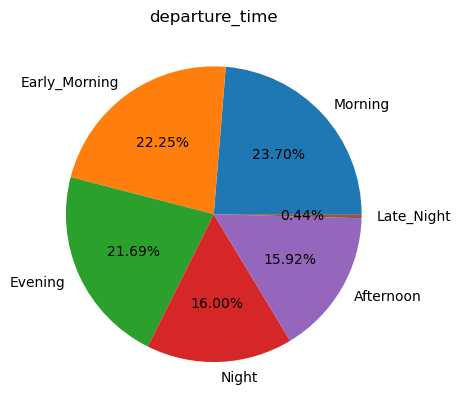

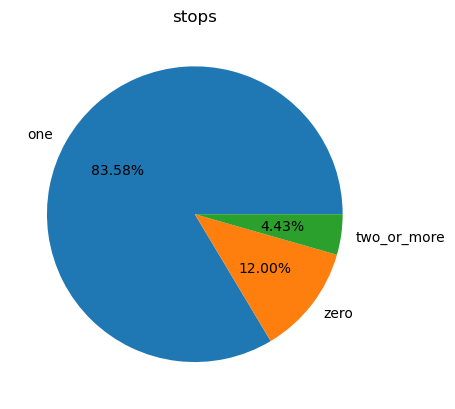

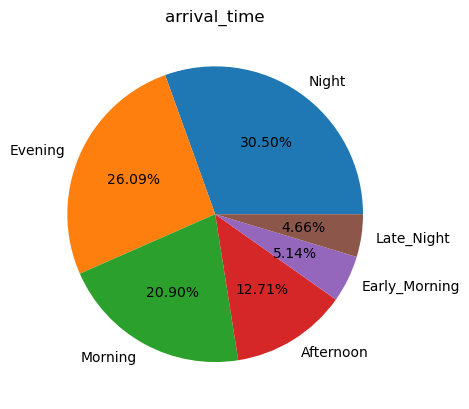

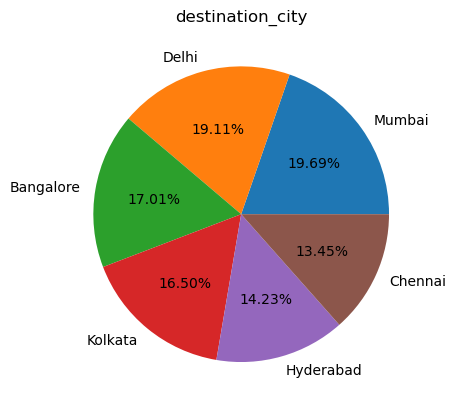

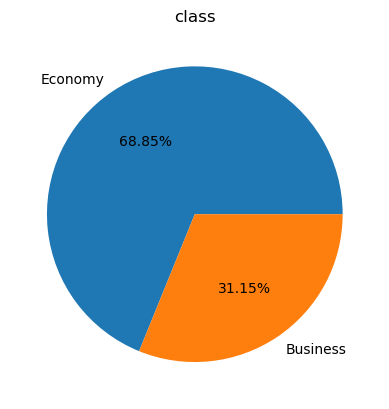

In [37]:
for i in cat:
 data=flight_df[i].value_counts()
 ke=data.keys()
 va=data.values
 plt.pie(labels=ke,x=va,autopct='%0.2f%%',radius=1)
 plt.title(i)
 plt.show()

**Numerical Column Analysis**

In [39]:
num

Index(['duration', 'days_left', 'price'], dtype='object')

In [40]:
flight_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [41]:
flight_df['price'].nunique()

12157

In [42]:
flight_df['days_left'].nunique()

49

In [43]:
flight_data=flight_df['price']
flight_min=min(flight_data)
flight_max=max(flight_data)
flight_mean=round(flight_data.mean(),2)
flight_med=round(flight_data.median(),2)
flight_std=round(flight_data.std(),2)

print(f" the min price of flight is :{flight_min}")
print(f"the max price of flight is : {flight_max}")
print(f" the mean price of flight is : {flight_mean}")
print(f"the median price of flight is : {flight_med}")
print(f" the std price of flight is : {flight_std}")

 the min price of flight is :1105
the max price of flight is : 123071
 the mean price of flight is : 20889.66
the median price of flight is : 7425.0
 the std price of flight is : 22697.77


**Convert into a dataframe**

In [45]:
flight_data=flight_df['price']
flight_count=len(flight_data)
flight_min=min(flight_data)
flight_max=max(flight_data)
flight_mean=round(flight_data.mean(),2)
flight_med=round(flight_data.median(),2)
flight_std=round(flight_data.std(),2)

idx=['count','min','max','mean','med','std']
data=[flight_count,flight_min,flight_max,flight_mean,flight_med,flight_std]
cols=['price']
pd.DataFrame(data,index=idx,columns=cols)

,price
count,300153.00
min,1105.00
max,123071.00
mean,20889.66
med,7425.00
std,22697.77


**PERCENTILE AND QUANTILE**

In [47]:
flight_data=flight_df['price']
np.percentile(flight_data,25)

4783.0

In [48]:
flight_data=flight_df['price']
np.quantile(flight_data,0.25)

4783.0

In [49]:
25*300153/100

75038.25

In [50]:
flight_data=flight_df['price']
flight_25p=np.percentile(flight_data,25)
con=flight_data<flight_25p
len(flight_data[con])

74828

In [51]:
flight_data=flight_df['price']
flight_50p=np.percentile(flight_data,50)
con=flight_data<flight_50p
len(flight_data[con]), 50*300153/100

(149514, 150076.5)

In [52]:
flight_data=flight_df['price']
flight_75p=np.percentile(flight_data,75)
con=flight_data<flight_75p
len(flight_data[con]), 75*300153/100

(224984, 225114.75)

In [53]:
flight_data=flight_df['price']
flight_count=len(flight_data)
flight_min=min(flight_data)
flight_max=max(flight_data)
flight_mean=round(flight_data.mean(),2)
flight_med=round(flight_data.median(),2)
flight_std=round(flight_data.std(),2)
flight_25p=np.percentile(flight_data,25)
flight_50p=np.percentile(flight_data,50)
flight_75p=np.percentile(flight_data,75)

idx=['count','min','max','mean','median','std','25%','50%','75%']
data=[flight_count,flight_min,flight_max,flight_mean,flight_med,flight_std,flight_25p,flight_50p,flight_75p]
cols=['Price']
pd.DataFrame(data,index=idx,columns=cols)

,Price
count,300153.00
min,1105.00
max,123071.00
mean,20889.66
median,7425.00
std,22697.77
25%,4783.00
50%,7425.00
75%,42521.00


In [54]:
num

Index(['duration', 'days_left', 'price'], dtype='object')

In [55]:
flight_df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [56]:
flight_data=flight_df['price']
flight_25p=np.percentile(flight_data,25)
flight_df[flight_data<flight_25p]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
2504,Vistara,UK-975,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,15,2476
2505,Vistara,UK-953,Delhi,Night,zero,Night,Mumbai,Economy,2.17,15,2476
2506,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,15,2700
2507,Vistara,UK-993,Delhi,Afternoon,zero,Afternoon,Mumbai,Economy,2.17,15,2700
2508,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,15,2700
...,...,...,...,...,...,...,...,...,...,...,...
206634,Air_India,AI-766,Chennai,Morning,one,Night,Hyderabad,Economy,9.92,49,3872
206635,Air_India,AI-539,Chennai,Evening,one,Morning,Hyderabad,Economy,16.00,49,3979
206636,Air_India,AI-430,Chennai,Morning,one,Morning,Hyderabad,Economy,23.08,49,3979
206637,Air_India,AI-440,Chennai,Early_Morning,one,Morning,Hyderabad,Economy,26.83,49,3979


In [57]:
flight_data=flight_df['price']
flight_50p=np.percentile(flight_data,50)
flight_df[flight_data<flight_50p]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
206656,Vistara,UK-822,Chennai,Morning,one,Night,Hyderabad,Economy,11.17,49,6032
206657,Vistara,UK-828,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.92,49,6032
206658,Air_India,AI-569,Chennai,Early_Morning,one,Night,Hyderabad,Economy,17.25,49,6541
206659,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Economy,10.00,49,6966


In [58]:
flight_data=flight_df['price']
flight_75p=np.percentile(flight_data,75)
flight_df[flight_data<flight_75p]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300122,Vistara,UK-822,Chennai,Morning,one,Early_Morning,Hyderabad,Business,22.08,49,41064
300123,Vistara,UK-826,Chennai,Afternoon,one,Afternoon,Hyderabad,Business,23.75,49,41064
300124,Vistara,UK-824,Chennai,Night,one,Night,Hyderabad,Business,24.42,49,41064
300125,Vistara,UK-828,Chennai,Early_Morning,one,Early_Morning,Hyderabad,Business,24.83,49,41064


**EMPHERICAL RULE**

In [60]:
mean=flight_df['price'].mean()
std=flight_df['price'].std()
lb=mean-1*std

mean=flight_df['price'].mean()
std=flight_df['price'].std()
ub=mean+1*std

con1=flight_df['price']>lb
con2=flight_df['price']<ub
con3=con1&con2
len(flight_df[con]), 68*300153/100

(224984, 204104.04)

In [61]:
mean=flight_df['price'].mean()
std=flight_df['price'].std()
lb=mean-2*std

mean=flight_df['price'].mean()
std=flight_df['price'].std()
ub=mean+2*std

con1=flight_df['price']>lb
con2=flight_df['price']<ub
con3=con1&con2
len(flight_df[con]), 95*300153/100

(224984, 285145.35)

In [62]:
mean=flight_df['price'].mean()
std=flight_df['price'].std()
lb=mean-3*std

mean=flight_df['price'].mean()
std=flight_df['price'].std()
ub=mean+3*std

con1=flight_df['price']>lb
con2=flight_df['price']<ub
con3=con1&con2
len(flight_df[con]) , 99.7*300153/100

(224984, 299252.541)

**HIstogram**

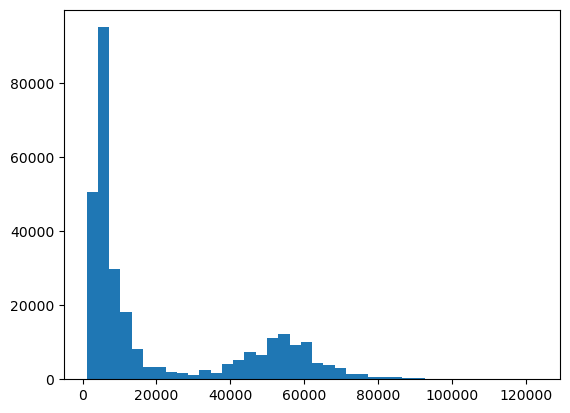

In [64]:
count,intervals,n=plt.hist(flight_df['price'],
bins=40)

In [65]:
count

array([5.0582e+04, 9.5145e+04, 2.9733e+04, 1.8201e+04, 8.0720e+03,
       3.1860e+03, 3.2200e+03, 1.9510e+03, 1.6440e+03, 1.2500e+03,
       2.4410e+03, 1.6560e+03, 4.2390e+03, 5.1480e+03, 7.5080e+03,
       6.6920e+03, 1.1158e+04, 1.2167e+04, 9.3560e+03, 9.9880e+03,
       4.2900e+03, 3.9370e+03, 3.0540e+03, 1.3570e+03, 1.4240e+03,
       7.3800e+02, 7.4800e+02, 4.8200e+02, 2.1300e+02, 2.6000e+02,
       1.0900e+02, 7.4000e+01, 4.1000e+01, 4.0000e+01, 2.5000e+01,
       9.0000e+00, 6.0000e+00, 7.0000e+00, 1.0000e+00, 1.0000e+00])

In [66]:
intervals

array([  1105.  ,   4154.15,   7203.3 ,  10252.45,  13301.6 ,  16350.75,
        19399.9 ,  22449.05,  25498.2 ,  28547.35,  31596.5 ,  34645.65,
        37694.8 ,  40743.95,  43793.1 ,  46842.25,  49891.4 ,  52940.55,
        55989.7 ,  59038.85,  62088.  ,  65137.15,  68186.3 ,  71235.45,
        74284.6 ,  77333.75,  80382.9 ,  83432.05,  86481.2 ,  89530.35,
        92579.5 ,  95628.65,  98677.8 , 101726.95, 104776.1 , 107825.25,
       110874.4 , 113923.55, 116972.7 , 120021.85, 123071.  ])

In [67]:
lb=5.0582e+04
ub=9.5145e+04

con1=flight_df['price']<lb
con2=flight_df['price']>ub
con3=con1&con2
len(flight_df['price'])

300153

**BOXPLOT**

In [69]:
flight_data=flight_df['price']
q1=round(np.quantile(flight_data,0.25),2)
q3=round(np.quantile(flight_data,0.75),2)

IQR=q3-q1

lb=q1-1.5*IQR
ub=q3+1.5*IQR

con1=flight_df['price']<lb
con2=flight_df['price']>ub
con3=con1|con2
count=len(flight_df[con3])

In [70]:
count

123

In [71]:
outliers_data=flight_df[con3]
outliers_data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434
215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
216025,Vistara,UK-817,Delhi,Evening,two_or_more,Morning,Kolkata,Business,17.58,4,100395
216094,Vistara,UK-995,Delhi,Morning,one,Evening,Kolkata,Business,6.50,5,99129
216095,Vistara,UK-963,Delhi,Morning,one,Evening,Kolkata,Business,8.00,5,101369
...,...,...,...,...,...,...,...,...,...,...,...
293474,Vistara,UK-836,Chennai,Morning,one,Night,Bangalore,Business,9.67,3,107597
296001,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,3,102832
296081,Vistara,UK-832,Chennai,Early_Morning,one,Night,Kolkata,Business,15.83,5,102384
296170,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,7,104624


In [72]:
flight_data=flight_df['price']
q1=round(np.quantile(flight_data,0.25),2)
q3=round(np.quantile(flight_data,0.75),2)

IQR=q3-q1

lb=q1-1.5*IQR
ub=q3+1.5*IQR

con1=flight_df['price']>lb
con2=flight_df['price']<ub
con3=con1&con2
count=len(flight_df[con])
count

224984

In [73]:
non_outliers_data=flight_df[con3]
non_outliers_data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


(array([179192.,  26611.,   6749.,   8510.,  19733.,  33220.,  19477.,
          4393.,   1678.,    467.]),
 array([ 1105. , 10891.7, 20678.4, 30465.1, 40251.8, 50038.5, 59825.2,
        69611.9, 79398.6, 89185.3, 98972. ]),
 <BarContainer object of 10 artists>)

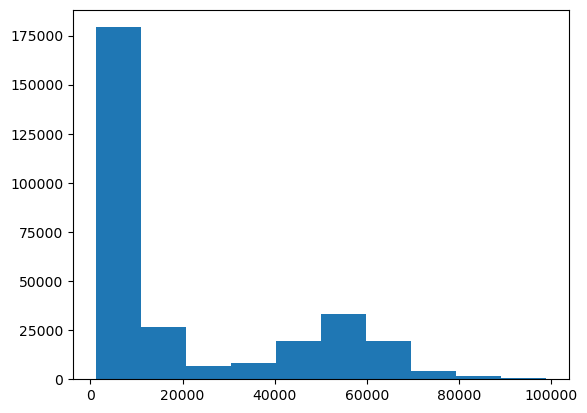

In [74]:
plt.hist(non_outliers_data['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2018c96bbc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2018c9d1d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2018cb92c60>],
 'medians': [<matplotlib.lines.Line2D at 0x2018af83650>],
 'fliers': [<matplotlib.lines.Line2D at 0x2018af82c00>],
 'means': []}

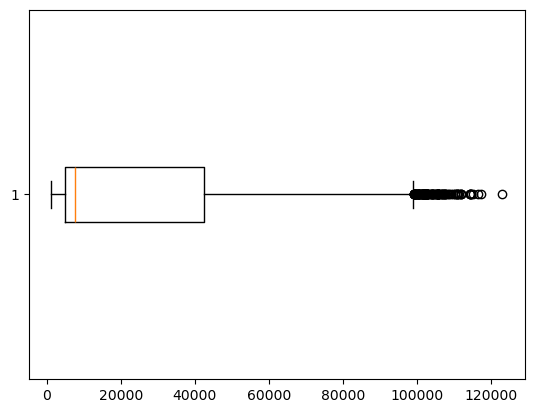

In [75]:
plt.boxplot(flight_df['price'],vert=False)

<Axes: xlabel='price'>

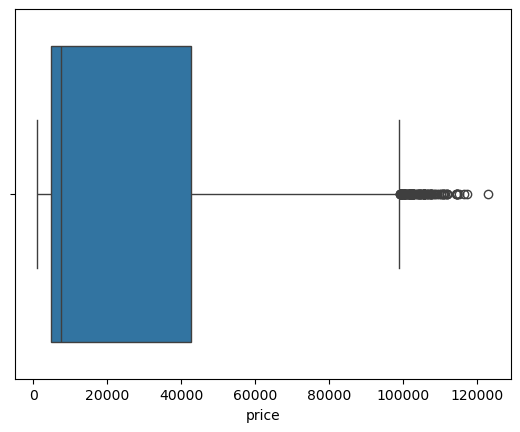

In [76]:
sns.boxplot(flight_df['price'],orient='h')

Text(0.5, 1.0, 'box_plot_with_non_outliers_data')

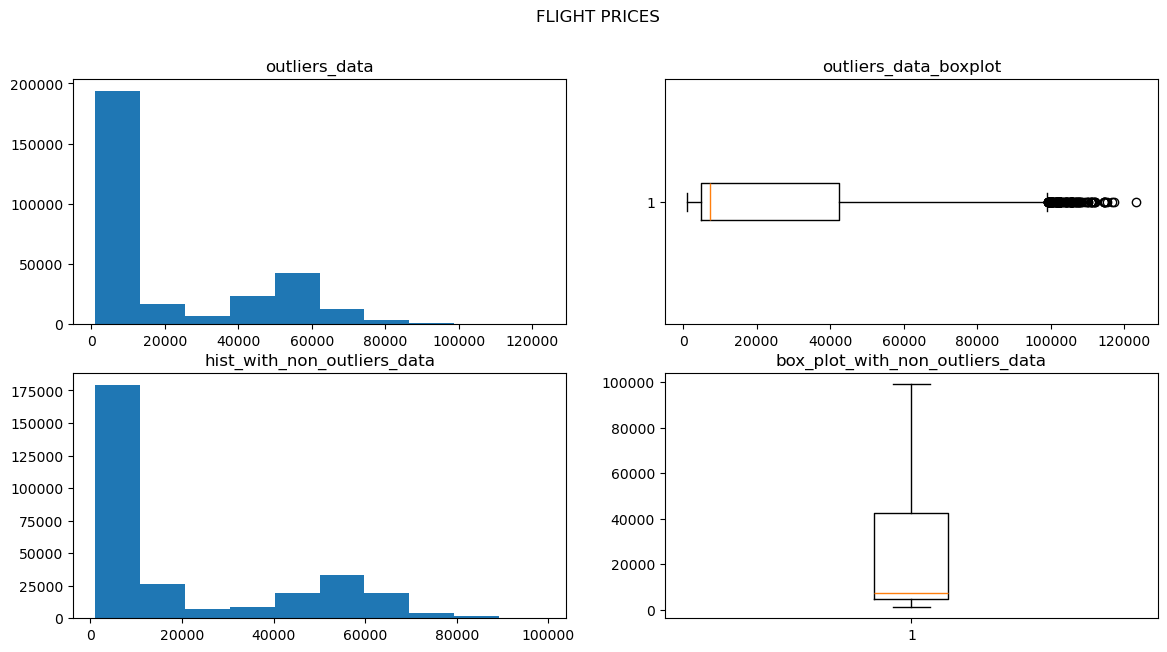

In [77]:
plt.figure(figsize=(14,7))
plt.suptitle('FLIGHT PRICES')
plt.subplot(2,2,1)
plt.hist(flight_df['price'])
plt.title('outliers_data')
plt.subplot(2,2,2)
plt.boxplot(flight_df['price'],vert=False)
plt.title('outliers_data_boxplot')
plt.subplot(2,2,3)
plt.hist(non_outliers_data['price'])
plt.title('hist_with_non_outliers_data')
plt.subplot(2,2,4)
plt.boxplot(non_outliers_data['price'])
plt.title('box_plot_with_non_outliers_data')

**Outlier_Analysis**

- how to treat the outliers

- drop the outliers

- fill with median

- fill with cap values

In [79]:
flight_data=flight_df['price']
q1=round(np.quantile(flight_data,0.25),2)
q3=round(np.quantile(flight_data,0.75),2)

IQR=q3-q1

lb=q1-1.5*IQR
ub=q3+1.5*IQR

median=flight_data.median()
new_data=[]
for i in flight_data:
    if i<lb or i>ub:
        new_data.append(median)
    else:
        new_data.append(i)
flight_df['pflight']=new_data

{'whiskers': [<matplotlib.lines.Line2D at 0x2018cdb28d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2018c906d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2018cdb23c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2018cdb2b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2018cdb2e40>],
 'means': []}

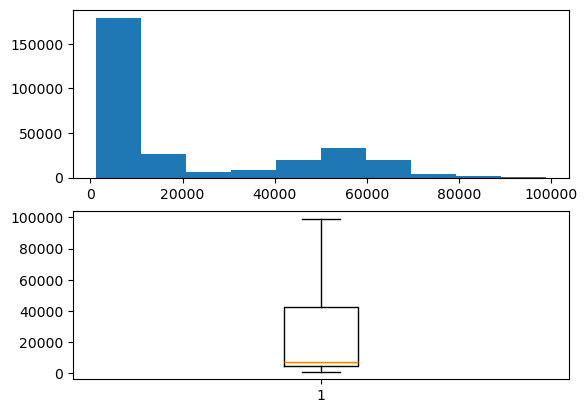

In [80]:
plt.subplot(2,1,1).hist(flight_df['pflight'])
plt.subplot(2,1,2).boxplot(flight_df['pflight'])

**Replacing the outliers using np.where**

In [82]:
flight_data=flight_df['price']
q1=round(np.quantile(flight_data,0.25),2)
q3=round(np.quantile(flight_data,0.75),2)

IQR=q3-q1

lb=q1-1.5*IQR
ub=q3+1.5*IQR

median=flight_data.median()

con=(flight_df['price']<lb)|(flight_df['price']>ub)
true=median
false=flight_df['price']
flight_df['pflight_1']=np.where(con,true,false)

{'whiskers': [<matplotlib.lines.Line2D at 0x2018d819a90>,
 'caps': [<matplotlib.lines.Line2D at 0x2018d81a360>,
 'boxes': [<matplotlib.lines.Line2D at 0x2018d8199a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2018d81a6f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2018d81aa50>],
 'means': []}

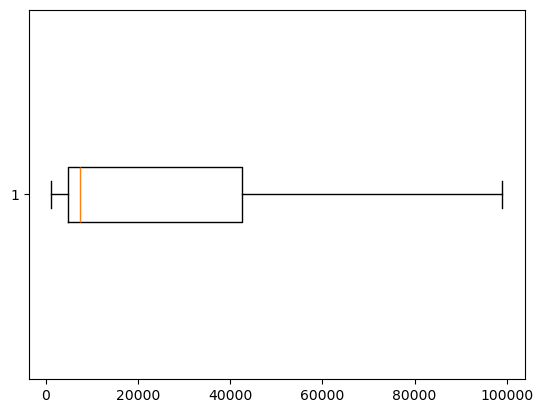

In [83]:
plt.boxplot(flight_df['pflight_1'],vert=False)

**BIVARIATE ANALYSIS**

In [85]:
con1=flight_df['airline']=='Vistara'
con2=flight_df['class']=='Business'
con3=con1&con2
len(flight_df[con3])

60589

In [86]:
unique=flight_df['airline'].unique()
for i in unique:
    con1=flight_df['airline']==i
    con2=flight_df['class']=='Economy'
    con3=con1&con2
    count=len(flight_df[con3])
    print(f"the number of business class tickets in {i} are : {count}")

the number of business class tickets in SpiceJet are : 9011
the number of business class tickets in AirAsia are : 16098
the number of business class tickets in Vistara are : 67270
the number of business class tickets in GO_FIRST are : 23173
the number of business class tickets in Indigo are : 43120
the number of business class tickets in Air_India are : 47994


In [87]:
unique=flight_df['airline'].unique()
Economy,Business=[],[]
for i in unique:
    con1=flight_df['airline']==i
    con2=flight_df['class']=='Economy'
    con3=flight_df['class']=='Business'
    Eco_con=con1&con2
    Bus_con=con1&con3
    Economy.append(len(flight_df[Eco_con]))
    Business.append(len(flight_df[Bus_con]))
    

In [88]:
Economy,Business

([9011, 16098, 67270, 23173, 43120, 47994], [0, 0, 60589, 0, 0, 32898])

In [89]:
pd.DataFrame(zip(Economy,Business),index=unique,columns=['Economy','Business'])

,Economy,Business
SpiceJet,9011,0
AirAsia,16098,0
Vistara,67270,60589
GO_FIRST,23173,0
Indigo,43120,0
Air_India,47994,32898


**CROSS TAB**

In [91]:
con1=flight_df['airline']
con2=flight_df['class']
pd.crosstab(con1,con2)

class,Business,Economy
airline,,
AirAsia,0,16098
Air_India,32898,47994
GO_FIRST,0,23173
Indigo,0,43120
SpiceJet,0,9011
Vistara,60589,67270


In [92]:
pd.crosstab(con2,con1)

airline,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
class,,,,,,
Business,0,32898,0,0,0,60589
Economy,16098,47994,23173,43120,9011,67270


In [93]:
col1=flight_df['airline']
col2=flight_df['class']
r1=pd.crosstab(col1,col2)
r2=pd.crosstab(col2,col1)

<Axes: xlabel='airline'>

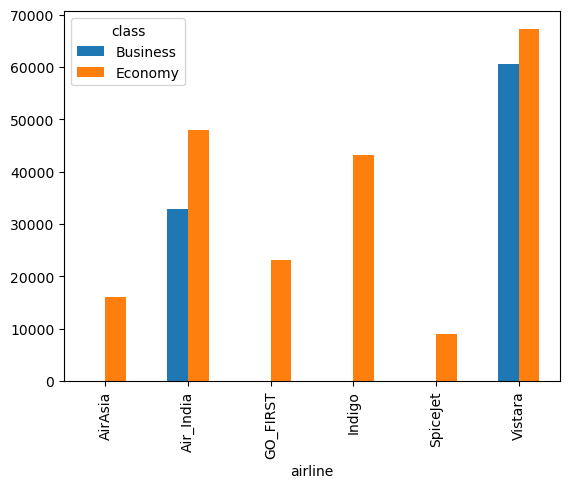

In [94]:
r1.plot(kind='bar')

<Axes: xlabel='class'>

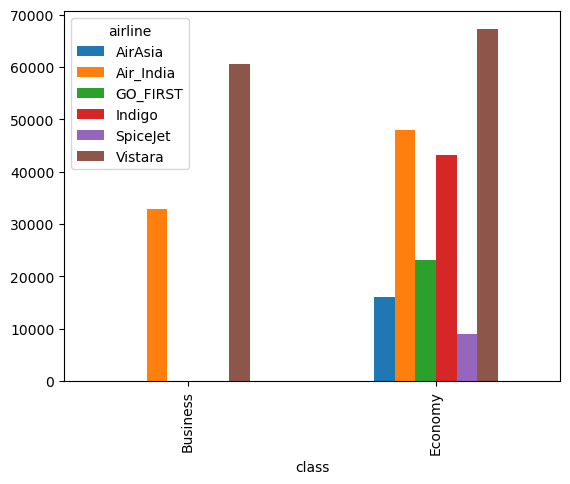

In [95]:
r2.plot(kind='bar')

In [96]:
flight_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,pflight,pflight_1
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,5953.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,5953.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,5956.0,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,5955.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,5955.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,69265.0,69265.0
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,77105.0,77105.0
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,79099.0,79099.0
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,81585.0,81585.0


**Multivarite**

In [98]:
col1=flight_df['airline']
col2=flight_df['class']
col3=flight_df['source_city']
r1=pd.crosstab(col1,[col2,col3])
r1

class        Business                                           Economy  \
source_city Bangalore Chennai  Delhi Hyderabad Kolkata Mumbai Bangalore   
airline                                                                   
AirAsia             0       0      0         0       0      0      3364   
Air_India        4840    4137   7202      4392    4990   7337      7212   
GO_FIRST            0       0      0         0       0      0      4498   
Indigo              0       0      0         0       0      0      7080   
SpiceJet            0       0      0         0       0      0      1255   
Vistara         11601    8392  11114      8478    8483  12521     12211   

class                                                
source_city Chennai  Delhi Hyderabad Kolkata Mumbai  
airline                                              
AirAsia        1498   4387      1844    2829   2176  
Air_India      5775   9861      6696    7410  11040  
GO_FIRST       1289   5724      2504    3590   5568  
Indigo         6746   8277      6215    7296   7506  
SpiceJet       1219   2524       332    1947   1734  
Vistara        9644  12254     10345    9802  13014

In [99]:
r2=pd.crosstab(col2,[col1,col3])
r2

airline       AirAsia                                        Air_India  \
source_city Bangalore Chennai Delhi Hyderabad Kolkata Mumbai Bangalore   
class                                                                    
Business            0       0     0         0       0      0      4840   
Economy          3364    1498  4387      1844    2829   2176      7212   

airline                              ... SpiceJet                           \
source_city Chennai Delhi Hyderabad  ...    Delhi Hyderabad Kolkata Mumbai   
class                                ...                                     
Business       4137  7202      4392  ...        0         0       0      0   
Economy        5775  9861      6696  ...     2524       332    1947   1734   

airline       Vistara                                          
source_city Bangalore Chennai  Delhi Hyderabad Kolkata Mumbai  
class                                                          
Business        11601    8392  11114      8478    8483  12521  
Economy         12211    9644  12254     10345    9802  13014  

[2 rows x 36 columns]

In [100]:
r3=pd.crosstab(col3,[col2,col1])
r3

class        Business         Economy                                     \
airline     Air_India Vistara AirAsia Air_India GO_FIRST Indigo SpiceJet   
source_city                                                                
Bangalore        4840   11601    3364      7212     4498   7080     1255   
Chennai          4137    8392    1498      5775     1289   6746     1219   
Delhi            7202   11114    4387      9861     5724   8277     2524   
Hyderabad        4392    8478    1844      6696     2504   6215      332   
Kolkata          4990    8483    2829      7410     3590   7296     1947   
Mumbai           7337   12521    2176     11040     5568   7506     1734   

class                
airline     Vistara  
source_city          
Bangalore     12211  
Chennai        9644  
Delhi         12254  
Hyderabad     10345  
Kolkata        9802  
Mumbai        13014

<Axes: xlabel='airline'>

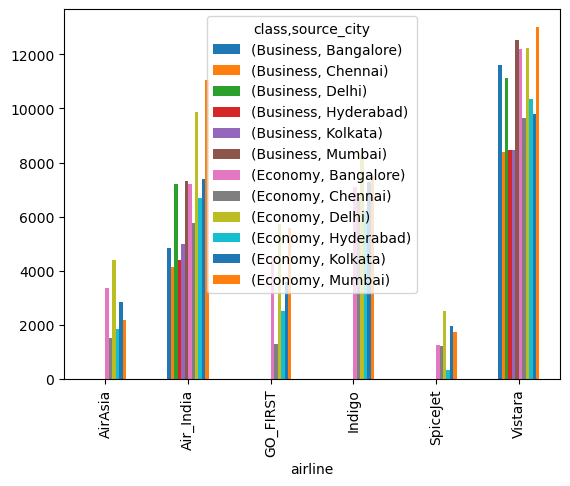

In [101]:
r1.plot(kind='bar')

**Numerical vs Numerical**

- Scatter plots are used to plot between two numerical columns

- it is under matplotlib

- it is represented as plt.scatter()

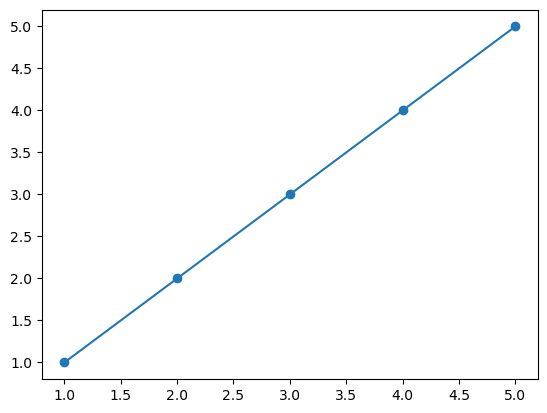

In [103]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

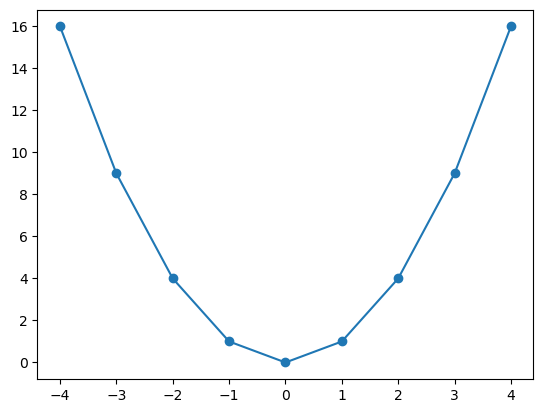

In [104]:
x=[i for i in range(-4,5)]
y=[i*i for i in range(-4,5)]
plt.scatter(x,y)
plt.plot(x,y)

In [105]:
num

Index(['duration', 'days_left', 'price'], dtype='object')

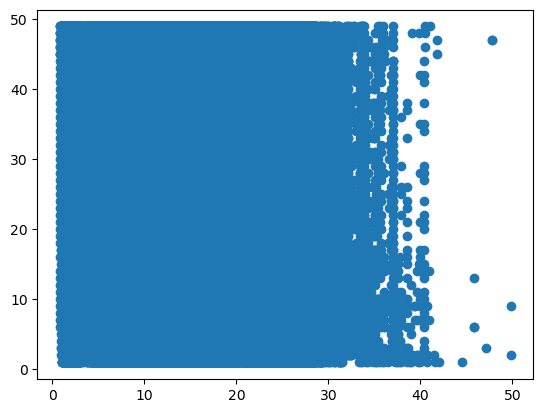

In [106]:
col1=flight_df['duration']
col2=flight_df['days_left']
col3=flight_df['price']
plt.scatter(col1,col2)


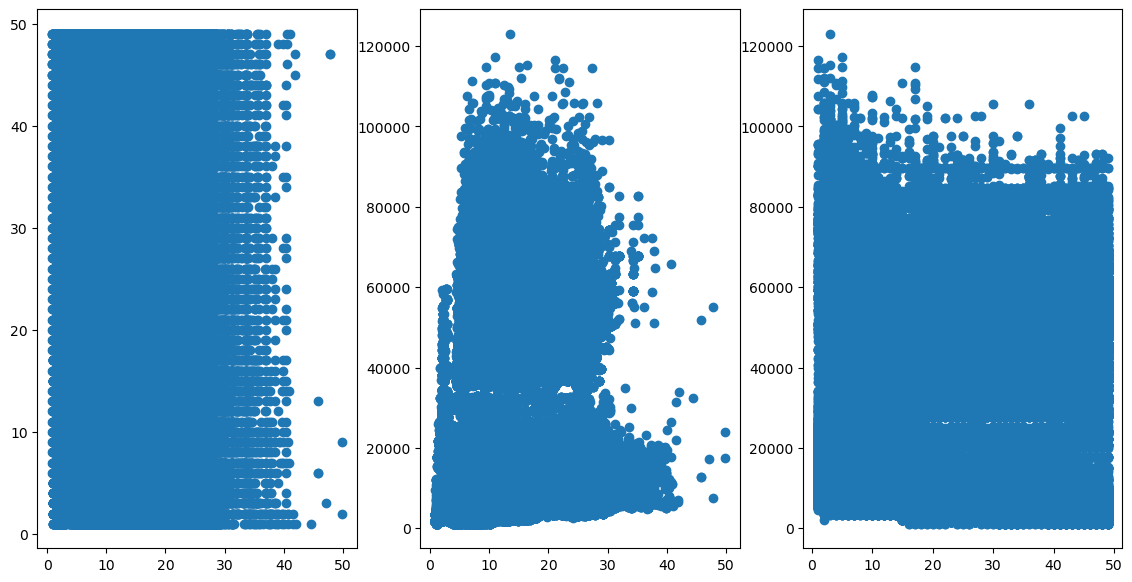

In [107]:
plt.figure(figsize=(14,7))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col1,col3)
plt.subplot(1,3,3).scatter(col2,col3)

**CORRELATION**

In [109]:
flight_df.corr(numeric_only=True)

,duration,days_left,price,pflight,pflight_1
duration,1.000000,-0.039157,0.204222,0.204240,0.204240
days_left,-0.039157,1.000000,-0.091949,-0.089896,-0.089896
price,0.204222,-0.091949,1.000000,0.996228,0.996228
pflight,0.204240,-0.089896,0.996228,1.000000,1.000000
pflight_1,0.204240,-0.089896,0.996228,1.000000,1.000000


**HEAT MAPS**

<Axes: >

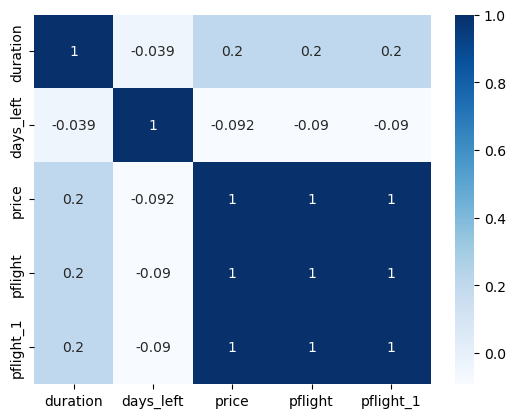

In [111]:
corr=flight_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='Blues')

**ENCODING**

- It is very important to convert categorical column to numerical column

- Some methods in ENCODING are

- Map

- Label Encoder

- np.where

- one hot encoder

**MAP FUNCTION**

In [114]:
flight_df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [115]:
d={'Business':0,'Economy':1}
flight_df['class']=flight_df['class'].map(d)

In [116]:
flight_df[['class']]

,class
0,1
1,1
2,1
3,1
4,1
...,...
300148,0
300149,0
300150,0
300151,0


In [117]:
flight_df=pd.read_csv(r"C:\Users\Lenovo\Music\EDA Practice\Clean_Dataset.csv")
flight_df.drop('Unnamed: 0',axis=1,inplace=True)
for col in cat:
    d={}
    labels=flight_df[col].unique()
    for i in range (len(labels)):
        d[labels[i]]=i
    flight_df[col]=flight_df[col].map(d)

In [118]:
flight_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,0,0,0,0,0,0,0,2.17,1,5953
1,0,1,0,1,0,1,0,0,2.33,1,5953
2,1,2,0,1,0,2,0,0,2.17,1,5956
3,2,3,0,2,0,3,0,0,2.25,1,5955
4,2,4,0,2,0,1,0,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,2,1457,5,2,1,4,3,1,10.08,49,69265
300149,2,1461,5,3,1,0,3,1,10.42,49,77105
300150,2,1437,5,1,1,0,3,1,13.83,49,79099
300151,2,1462,5,1,1,4,3,1,10.00,49,81585


**Label Encoder**

-  it is also used to convert categorical column to numerical column

-  it is a sklearn package

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
le=LabelEncoder()

In [122]:
flight_df['class']=le.fit_transform(flight_df['class'])

In [123]:
flight_df['class']

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: class, Length: 300153, dtype: int64

In [124]:
flight_df=pd.read_csv(r"C:\Users\Lenovo\Music\EDA Practice\Clean_Dataset.csv")
flight_df.drop('Unnamed: 0',axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    flight_df[i]=le.fit_transform(flight_df[i])
flight_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


**NP.WHERE**

In [126]:
flight_df=pd.read_csv(r"C:\Users\Lenovo\Music\EDA Practice\Clean_Dataset.csv")
flight_df.drop('Unnamed: 0',axis=1,inplace=True)
con=flight_df['class']=='Business'
true=1
false=0
np.where(con,true,false)

array([0, 0, 0, ..., 1, 1, 1])

**One Hot Encoder**

- One hot means at a time only one will on another will off

- on represents 1

- off represents 0

In [128]:
flight_df=pd.read_csv(r"C:\Users\Lenovo\Music\EDA Practice\Clean_Dataset.csv")
flight_df.drop('Unnamed: 0',axis=1,inplace=True)
pd.get_dummies(flight_df['class'],prefix=['class'],dtype=int)

,['class']_Business,['class']_Economy
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
300148,1,0
300149,1,0
300150,1,0
300151,1,0


In [129]:
pd.get_dummies(flight_df,dtype=int)

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,flight_6E-102,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2.33,1,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2.17,1,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2.25,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2.33,1,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
300149,10.42,49,77105,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
300150,13.83,49,79099,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
300151,10.00,49,81585,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


**SCALE THE DATA**

- Zscore=x-mean/std

In [131]:
flight_data=flight_df['price']
mean=flight_data.mean()
std=flight_data.std()
data=(flight_data-mean/std)

In [132]:
data

0          5952.07966
1          5952.07966
2          5955.07966
3          5954.07966
4          5954.07966
             ...     
300148    69264.07966
300149    77104.07966
300150    79098.07966
300151    81584.07966
300152    81584.07966
Name: price, Length: 300153, dtype: float64

**STANDARD SCALAR**

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
ss=StandardScaler()

In [136]:
ss.fit_transform(flight_df[['price']])

array([[-0.65806849],
       [-0.65806849],
       [-0.65793631],
       ...,
       [ 2.56454459],
       [ 2.67407096],
       [ 2.67407096]])

In [137]:
d=flight_df['price'].values.reshape(-1,1)
ss.fit_transform(d)

array([[-0.65806849],
       [-0.65806849],
       [-0.65793631],
       ...,
       [ 2.56454459],
       [ 2.67407096],
       [ 2.67407096]])

In [138]:
flight_df=pd.read_csv(r"C:\Users\Lenovo\Music\EDA Practice\Clean_Dataset.csv")
flight_df.drop('Unnamed: 0',axis=1,inplace=True)
flight_data=flight_df['price']
mean=flight_data.mean()
std=flight_data.std()
flight_df['price_Z']=(flight_data-mean/std)

In [139]:
flight_df['price_Z']

0          5952.07966
1          5952.07966
2          5955.07966
3          5954.07966
4          5954.07966
             ...     
300148    69264.07966
300149    77104.07966
300150    79098.07966
300151    81584.07966
300152    81584.07966
Name: price_Z, Length: 300153, dtype: float64

In [140]:
flight_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_Z
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,5952.07966
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,5952.07966
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,5955.07966
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,5954.07966
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,5954.07966
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,69264.07966
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,77104.07966
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,79098.07966
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,81584.07966


In [141]:
flight_df[['price','price_Z']]

,price,price_Z
0,5953,5952.07966
1,5953,5952.07966
2,5956,5955.07966
3,5955,5954.07966
4,5955,5954.07966
...,...,...
300148,69265,69264.07966
300149,77105,77104.07966
300150,79099,79098.07966
300151,81585,81584.07966


{'whiskers': [<matplotlib.lines.Line2D at 0x2018b673200>,
 'caps': [<matplotlib.lines.Line2D at 0x2018b59a3f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2018bdbbbc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2018b59af00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2018b598170>],
 'means': []}

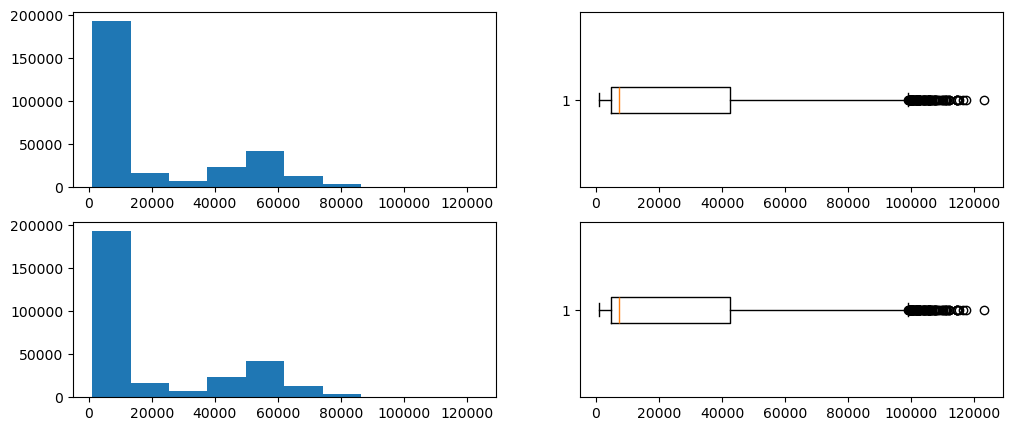

In [142]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1).hist(flight_df['price'])
plt.subplot(2,2,2).boxplot(flight_df['price'],vert=False)
plt.subplot(2,2,3).hist(flight_df['price_Z'])
plt.subplot(2,2,4).boxplot(flight_df['price_Z'],vert=False)

**IDX MAX & IDX MIN**

In [144]:
flight_df['price'].idxmin(), flight_df['price_Z'].idxmax()

(203807, 261377)

In [145]:
flight_df[['price','price_Z']].iloc[[203807,261377]]

,price,price_Z
203807,1105,1104.07966
261377,123071,123070.07966


**KNN IMPUTER**

- KNN means K-Nearsert Neighbours

- we will choose the least distance sample

In [147]:
from sklearn.impute import KNNImputer
knn=KNNImputer()

In [148]:
knn.fit_transform(flight_df[['price']])

array([[ 5953.],
       [ 5953.],
       [ 5956.],
       ...,
       [79099.],
       [81585.],
       [81585.]])